In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [20]:
data = pd.read_csv(r"C:\\Users\\Downloads\\A_Z Handwritten Data.csv").astype('float32')

# Split features and labels
X = data.drop('0', axis=1).values / 255.0   # Normalize
y = data['0'].values.astype(int)

In [21]:
from keras.utils import to_categorical

X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y, num_classes=26)  # All 26 letters (A–Z)

In [22]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(26, activation='softmax'))  # 26 output classes for A–Z

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
model.fit(train_x, train_y, epochs=5, batch_size=128, validation_data=(test_x, test_y))


Epoch 1/5
2328/2328 [==============================] - 242s 104ms/step - loss: 0.2329 - accuracy: 0.9346 - val_loss: 0.0704 - val_accuracy: 0.9806
Epoch 2/5
2328/2328 [==============================] - 232s 100ms/step - loss: 0.0909 - accuracy: 0.9747 - val_loss: 0.0540 - val_accuracy: 0.9849
Epoch 3/5
2328/2328 [==============================] - 232s 100ms/step - loss: 0.0691 - accuracy: 0.9806 - val_loss: 0.0483 - val_accuracy: 0.9866
Epoch 4/5
2328/2328 [==============================] - 234s 101ms/step - loss: 0.0554 - accuracy: 0.9842 - val_loss: 0.0394 - val_accuracy: 0.9894
Epoch 5/5
2328/2328 [==============================] - 242s 104ms/step - loss: 0.0467 - accuracy: 0.9863 - val_loss: 0.0360 - val_accuracy: 0.9902


2328/2328 [==============================] - 26s 11ms/step


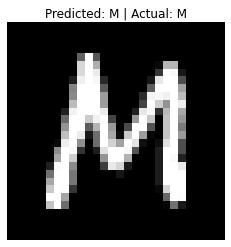

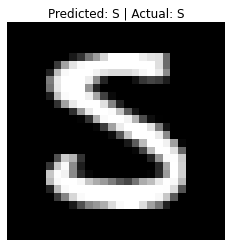

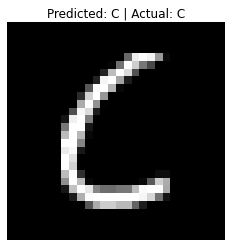

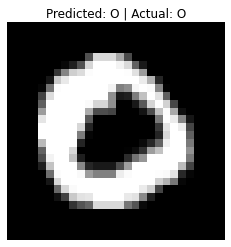

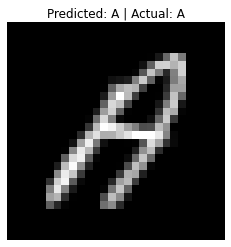

In [25]:
import matplotlib.pyplot as plt

word_dict = {i: chr(65 + i) for i in range(26)}  # for all AtoZ letters

pred_probs = model.predict(test_x)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(test_y, axis=1)

for i in range(5):
    plt.imshow(test_x[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {word_dict[pred_labels[i]]} | Actual: {word_dict[true_labels[i]]}")
    plt.axis('off')
    plt.show()


In [27]:
import cv2

img = cv2.imread('C:\\Users\\Downloads\\r letter.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))          # Resize to 28x28
img = 255 - img                          # Invert colors if black on white
img = img / 255.0                        # Normalize
img = img.reshape(1, 28, 28, 1)          # Reshape for model

# Predict
prediction = model.predict(img)
pred_class = np.argmax(prediction)
print(f"Predicted Letter: {word_dict[int(pred_class)]}")


1/1 [==============================] - 0s 36ms/step
Predicted Letter: R


In [28]:
import cv2

img = cv2.imread('C:\\Users\\Downloads\\d letter.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))          # Resize to 28x28
img = 255 - img                          # Invert colors if black on white
img = img / 255.0                        # Normalize
img = img.reshape(1, 28, 28, 1)          # Reshape for model

# Predict
prediction = model.predict(img)
pred_class = np.argmax(prediction)
print(f"Predicted Letter: {word_dict[int(pred_class)]}")


1/1 [==============================] - 0s 29ms/step
Predicted Letter: D
